In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from diagnostics import lm_plots

%matplotlib inline

line_kw = {'color':'red', 'alpha':0.5}
scatter_kw = {'marker':'o', 'edgecolors':'black', 'color':'white'}

## Exercise 10

This question should be answered using the `Carseats` dataset.

In [27]:
cars = pd.read_csv('../datasets/carseats.csv')
cars.Urban = pd.to_numeric(cars.Urban.str.lower() == 'yes').astype(np.int64)
cars.US = pd.to_numeric(cars.US.str.lower() == 'yes').astype(np.int64)

__(a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.__

In [31]:
y = cars.Sales
X = cars[['Price', 'Urban', 'US']]
XwithIntercept = sm.add_constant(X)
model = sm.OLS(y, XwithIntercept).fit()

__(b) Provide an interpretation of each coefficient in the model. Be careful some of the variables in the model are qualitative!__

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 07 Aug 2018   Prob (F-statistic):           2.39e-23
Time:                        23:05:31   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Interpretation of coefficients__

- Price: affects negatively on sales. Makes sense, at a higher price, less units sold.

- Urban: makes no difference (high pvalue) wether the store is in a "urban" or "rural" location.

- US: There are more units sold if the store is in the US.

__(c) Write out the model in equation form, being careful to handle the qualitative variables properly.__

In [40]:
b0, b1, b2, b3 = model.params

'y = {:.2f} + ({:.2f} * Price) + ({:.2f} * Urban) + ({:.2f} * US)'.format(b0, b1, b2, b3)

'y = 13.04 + (-0.05 * Price) + (-0.02 * Urban) + (1.20 * US)'

__(c) For which of the predictors can you reject the null hypothesis H0 βj =0__

- For `Price` and `US`

__(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.__

In [43]:
X2 = X.copy()
X2 = sm.add_constant(X2[['Price', 'US']])
model_2 = sm.OLS(y, X2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 07 Aug 2018   Prob (F-statistic):           2.66e-24
Time:                        23:19:17   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__(f) How well do the models in (a) and (e) fit the data?__

In [55]:
print('model 1 R2 = {:.5f} SSE = {:.5f}'.format(model.rsquared, model.ssr))
print('model 2 R2 = {:.5f} SSE = {:.5f}'.format(model_2.rsquared, model_2.ssr))

model 1 R2 = 0.23928 SSE = 2420.83467
model 2 R2 = 0.23926 SSE = 2420.87446


__(g) Using the model from (e) obtain 95% confidence intervals for the coefficients.__

In [72]:
model_2.conf_int()[1:]

,0,1
Price,-0.06476,-0.044195
US,0.69152,1.707766


__(h) Is there evidence of outliers or high leverage observations in the model from (e)?__

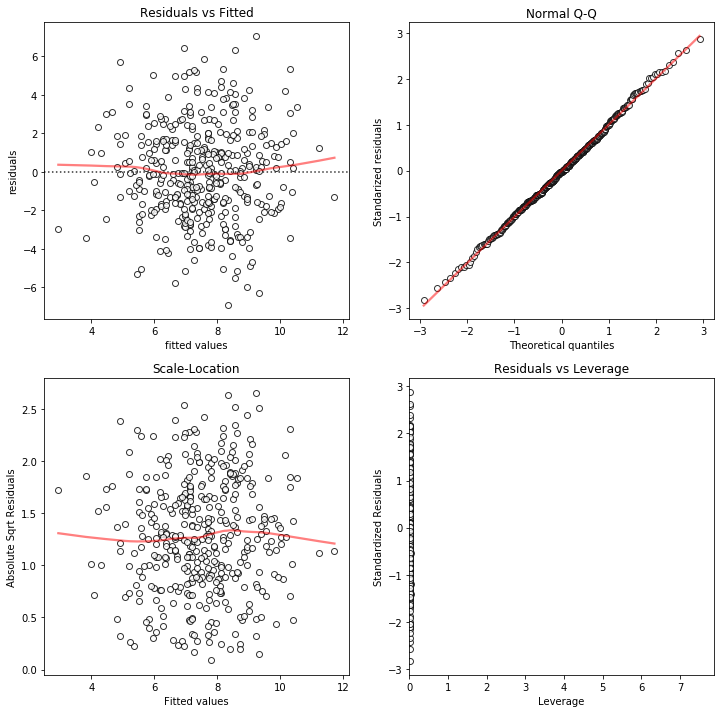

In [74]:
lm_plots(model_2, y)

- Nope